<a href="https://www.kaggle.com/code/sagorkumarmitra/task-1-creating-a-neural-network-mnist?scriptVersionId=150466639" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np

# Import Dataset

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

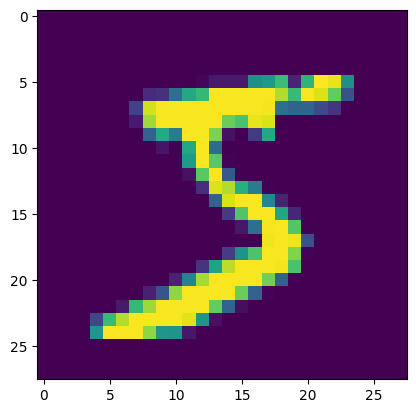

In [8]:
plt.imshow(single_image)

# PreProcessing

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

Converting the test data into categorical data

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

# Processing X Data

We have to normalize the X data in between 0 and 1 by dividing 255

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [22]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

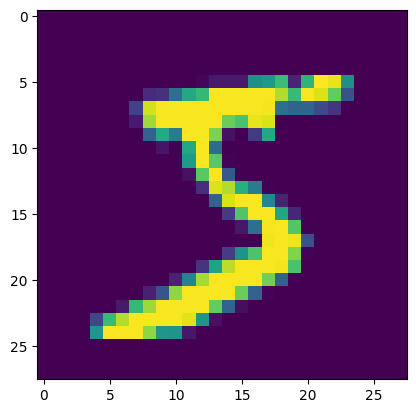

In [24]:
plt.imshow(scaled_single)

# Reshaping the Data

The dataset consists of 60,000 images with dimension of 28 by 28 pixel. We need to add one more dimension because RGB channel demands 3 dimensions.

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000,28,28,1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

We are heading toward the TensorFlow and Keras to train our model with 5 convolution layers.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# KERAS METRICS FOR REPORT GENERATION
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

**We are going to use Early Stops with patients 2 to avoid unnecessary training time.**

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Train the Model

**It's time to train our model. There we choose 10 epochs.**

In [36]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1461 - accuracy: 0.9552 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0516 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0436 - val_accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0412 - val_accuracy: 0.9867


# Evaluate the Model

**In this section we are going to generate Loss and Accuracy reports to evaluate our model performence.**

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.146126,0.955217,0.052653,0.9829
1,0.047625,0.985300,0.051644,0.9832
2,0.030252,0.990433,0.039638,0.9870
3,0.021762,0.993200,0.043645,0.9863
4,0.013715,0.995550,0.041248,0.9867


<Axes: >

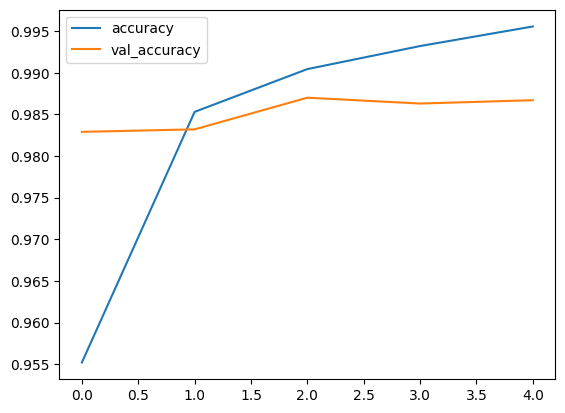

In [40]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

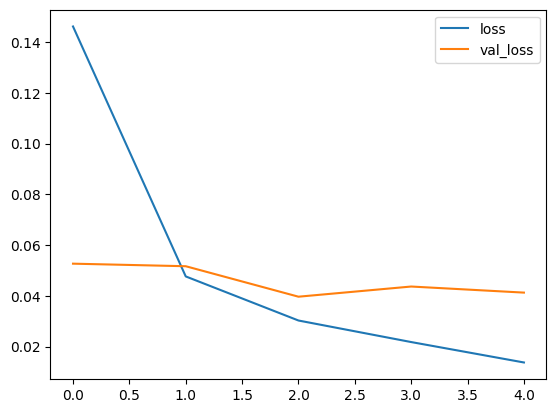

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04124803468585014, 0.9866999983787537]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predict_x=model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 4ms/step


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [47]:
predictions[0]

7

In [48]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Classification Report

In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Confusion Matrix

In [50]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    0,    1,    0,    2,    3,    0,    1,    0],
       [   0, 1126,    2,    1,    1,    1,    2,    0,    2,    0],
       [   1,    1, 1015,    1,    1,    0,    2,    6,    5,    0],
       [   0,    0,    0, 1002,    0,    7,    0,    0,    1,    0],
       [   0,    1,    0,    0,  963,    0,    5,    0,    1,   12],
       [   0,    0,    0,    4,    0,  887,    1,    0,    0,    0],
       [   4,    1,    1,    1,    1,    8,  940,    0,    2,    0],
       [   0,    3,    4,    1,    1,    0,    0, 1014,    2,    3],
       [   1,    0,    1,    3,    0,    4,    1,    1,  956,    7],
       [   1,    0,    0,    1,    4,    8,    0,    2,    2,  991]])

# Heatmap Generation

In [51]:
import seaborn as sns

<Axes: >

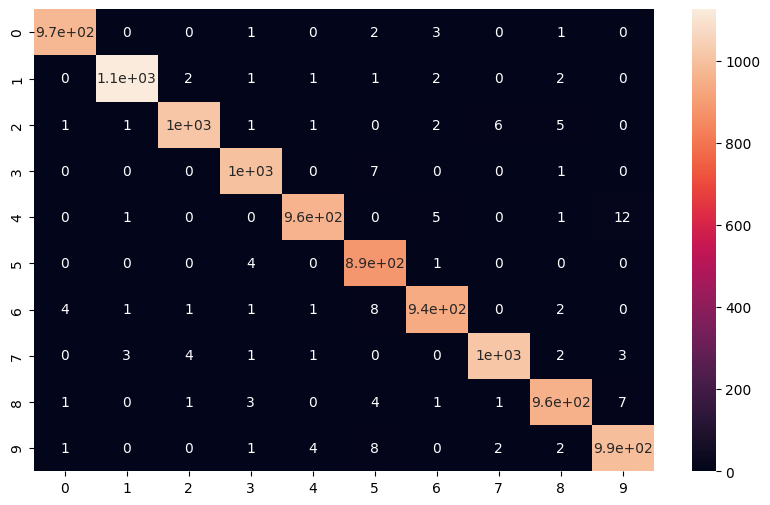

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a Random Image

In [53]:
my_number = x_test[0]

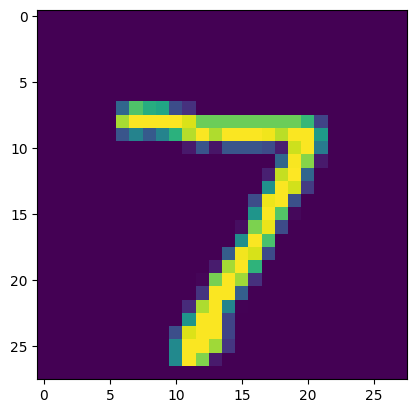

In [54]:
plt.imshow(my_number.reshape(28,28))

In [55]:
predict_x=model.predict(my_number.reshape(1,28,28,1))
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 17ms/step


In [56]:
classes_x

array([7])

# Final Part: Approach Description

MNIST is a greyscale dataset which was imported from the TensorFlow Dataset. 

1. The dataset contains ten classes so the just converted it into a categorical system which consists of 0 and 1. 
2. We also normalized our images by dividing 255 to bring down in between 0 and 1. 
3. Convolution Neural Network has been chosen with five layers to train the model because of the flexibility of choosing layers and neurons to optimize our predicted results. 
4. Early stopping methos was used successfully to avoid unnecessary training time.
5. Keras Metrics were used to generate evaluation reports.